In [2]:
#pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#pandas 中有三种基本结构 series dataframe panel

一维 `Series` 可以用一维列表初始化

In [5]:
s = pd.Series([1,3.5,np.nan,6,8])

In [6]:
s

0    1.0
1    3.5
2    NaN
3    6.0
4    8.0
dtype: float64

In [7]:
#默认情况，Series的下标都是数字

In [8]:
#DataFrame是个二维结构

In [9]:
dates = pd.date_range("20181227",periods=6)

In [10]:
dates

DatetimeIndex(['2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6,4),
                  index=dates,
                  columns=list('ABCD')
                 )

In [12]:
df

,A,B,C,D
2018-12-27,-1.112704,-0.707114,0.775486,0.540858
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417
2018-12-30,0.358810,0.767731,-1.227703,-0.108202
2018-12-31,-0.436523,1.879437,0.620379,1.675295
2019-01-01,-0.025608,1.093074,0.118501,-0.077329


In [13]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20181224'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2018-12-24,1.0,3,test,foo
1,1.0,2018-12-24,1.0,3,train,foo
2,1.0,2018-12-24,1.0,3,test,foo
3,1.0,2018-12-24,1.0,3,train,foo


字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [15]:
#查看数据

In [16]:
df.head()

,A,B,C,D
2018-12-27,-1.112704,-0.707114,0.775486,0.540858
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417
2018-12-30,0.358810,0.767731,-1.227703,-0.108202
2018-12-31,-0.436523,1.879437,0.620379,1.675295


In [17]:
df.tail(3)

,A,B,C,D
2018-12-30,0.358810,0.767731,-1.227703,-0.108202
2018-12-31,-0.436523,1.879437,0.620379,1.675295
2019-01-01,-0.025608,1.093074,0.118501,-0.077329


In [18]:
df.index

DatetimeIndex(['2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[-1.11270438, -0.7071141 ,  0.77548634,  0.54085814],
       [ 0.01529498, -0.12866725, -0.77909071, -1.13327944],
       [-0.09047874, -0.21930308,  0.28735208, -0.00341667],
       [ 0.35881044,  0.76773132, -1.22770324, -0.10820174],
       [-0.43652327,  1.87943694,  0.62037909,  1.67529457],
       [-0.02560791,  1.09307413,  0.11850067, -0.07732909]])

In [21]:
#统计数据

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.215201,0.447526,-0.034179,0.148988
std,0.507664,0.967418,0.798760,0.923902
min,-1.112704,-0.707114,-1.227703,-1.133279
25%,-0.350012,-0.196644,-0.554693,-0.100484
50%,-0.058043,0.319532,0.202926,-0.040373
75%,0.005069,1.011738,0.537122,0.404789
max,0.358810,1.879437,0.775486,1.675295


In [23]:
df.T

,2018-12-27 00:00:00,2018-12-28 00:00:00,2018-12-29 00:00:00,2018-12-30 00:00:00,2018-12-31 00:00:00,2019-01-01 00:00:00
A,-1.112704,0.015295,-0.090479,0.358810,-0.436523,-0.025608
B,-0.707114,-0.128667,-0.219303,0.767731,1.879437,1.093074
C,0.775486,-0.779091,0.287352,-1.227703,0.620379,0.118501
D,0.540858,-1.133279,-0.003417,-0.108202,1.675295,-0.077329


`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [24]:
df.sort_index(ascending=False)

,A,B,C,D
2019-01-01,-0.025608,1.093074,0.118501,-0.077329
2018-12-31,-0.436523,1.879437,0.620379,1.675295
2018-12-30,0.358810,0.767731,-1.227703,-0.108202
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-27,-1.112704,-0.707114,0.775486,0.540858


In [25]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-12-27,0.540858,0.775486,-0.707114,-1.112704
2018-12-28,-1.133279,-0.779091,-0.128667,0.015295
2018-12-29,-0.003417,0.287352,-0.219303,-0.090479
2018-12-30,-0.108202,-1.227703,0.767731,0.358810
2018-12-31,1.675295,0.620379,1.879437,-0.436523
2019-01-01,-0.077329,0.118501,1.093074,-0.025608


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [26]:
df.sort_values(by='B')

,A,B,C,D
2018-12-27,-1.112704,-0.707114,0.775486,0.540858
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-30,0.358810,0.767731,-1.227703,-0.108202
2019-01-01,-0.025608,1.093074,0.118501,-0.077329
2018-12-31,-0.436523,1.879437,0.620379,1.675295


虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

In [27]:
df['A']

2018-12-27   -1.112704
2018-12-28    0.015295
2018-12-29   -0.090479
2018-12-30    0.358810
2018-12-31   -0.436523
2019-01-01   -0.025608
Freq: D, Name: A, dtype: float64

In [28]:
df.A

2018-12-27   -1.112704
2018-12-28    0.015295
2018-12-29   -0.090479
2018-12-30    0.358810
2018-12-31   -0.436523
2019-01-01   -0.025608
Freq: D, Name: A, dtype: float64

In [29]:
df[0:3]

,A,B,C,D
2018-12-27,-1.112704,-0.707114,0.775486,0.540858
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417


In [30]:
df['20181227':"20181229"]

,A,B,C,D
2018-12-27,-1.112704,-0.707114,0.775486,0.540858
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417


In [31]:
df.loc[dates[0]]

A   -1.112704
B   -0.707114
C    0.775486
D    0.540858
Name: 2018-12-27 00:00:00, dtype: float64

In [32]:
dates

DatetimeIndex(['2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', freq='D')

In [33]:
df.loc[:,['A','B']]

,A,B
2018-12-27,-1.112704,-0.707114
2018-12-28,0.015295,-0.128667
2018-12-29,-0.090479,-0.219303
2018-12-30,0.358810,0.767731
2018-12-31,-0.436523,1.879437
2019-01-01,-0.025608,1.093074


In [34]:
df.loc['20181227',['A','B']]

A   -1.112704
B   -0.707114
Name: 2018-12-27 00:00:00, dtype: float64

In [35]:
df.loc[dates[0],'B']

-0.7071141028169198

In [36]:
df.at[dates[0],'B']

-0.7071141028169198

In [37]:
df.iloc[3]

A    0.358810
B    0.767731
C   -1.227703
D   -0.108202
Name: 2018-12-30 00:00:00, dtype: float64

In [38]:
df.iloc[3:5,0:2]

,A,B
2018-12-30,0.358810,0.767731
2018-12-31,-0.436523,1.879437


In [39]:
#索引不连续

In [40]:
df.iloc[[1,2,4],[0,2]]

,A,C
2018-12-28,0.015295,-0.779091
2018-12-29,-0.090479,0.287352
2018-12-31,-0.436523,0.620379


In [41]:
df.iloc[-1:3,:]

,A,B,C,D


In [42]:
df.iloc[:,1:3]

,B,C
2018-12-27,-0.707114,0.775486
2018-12-28,-0.128667,-0.779091
2018-12-29,-0.219303,0.287352
2018-12-30,0.767731,-1.227703
2018-12-31,1.879437,0.620379
2019-01-01,1.093074,0.118501


In [43]:
df.iloc[1,1]

-0.12866725125043574

In [44]:
df.iat[1,1]

-0.12866725125043574

In [45]:
#布尔型索引

In [46]:
df[df.A>0]

,A,B,C,D
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-30,0.358810,0.767731,-1.227703,-0.108202


In [47]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2018-12-27,-1.112704,-0.707114,0.775486,0.540858,one
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279,one
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417,two
2018-12-30,0.358810,0.767731,-1.227703,-0.108202,three
2018-12-31,-0.436523,1.879437,0.620379,1.675295,four
2019-01-01,-0.025608,1.093074,0.118501,-0.077329,three


In [48]:
df

,A,B,C,D
2018-12-27,-1.112704,-0.707114,0.775486,0.540858
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417
2018-12-30,0.358810,0.767731,-1.227703,-0.108202
2018-12-31,-0.436523,1.879437,0.620379,1.675295
2019-01-01,-0.025608,1.093074,0.118501,-0.077329


In [49]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417,two
2018-12-31,-0.436523,1.879437,0.620379,1.675295,four


In [50]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20181228',periods=6))

In [51]:
s1

2018-12-28    1
2018-12-29    2
2018-12-30    3
2018-12-31    4
2019-01-01    5
2019-01-02    6
Freq: D, dtype: int64

In [52]:
df['F']=s1

In [53]:
df

,A,B,C,D,F
2018-12-27,-1.112704,-0.707114,0.775486,0.540858,NaN
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279,1.0
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417,2.0
2018-12-30,0.358810,0.767731,-1.227703,-0.108202,3.0
2018-12-31,-0.436523,1.879437,0.620379,1.675295,4.0
2019-01-01,-0.025608,1.093074,0.118501,-0.077329,5.0


In [54]:
df.at[dates[0],'A'] = 0

In [55]:
df

,A,B,C,D,F
2018-12-27,0.000000,-0.707114,0.775486,0.540858,NaN
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279,1.0
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417,2.0
2018-12-30,0.358810,0.767731,-1.227703,-0.108202,3.0
2018-12-31,-0.436523,1.879437,0.620379,1.675295,4.0
2019-01-01,-0.025608,1.093074,0.118501,-0.077329,5.0


In [56]:
df.iat[0,1] = 0

In [57]:
df

,A,B,C,D,F
2018-12-27,0.000000,0.000000,0.775486,0.540858,NaN
2018-12-28,0.015295,-0.128667,-0.779091,-1.133279,1.0
2018-12-29,-0.090479,-0.219303,0.287352,-0.003417,2.0
2018-12-30,0.358810,0.767731,-1.227703,-0.108202,3.0
2018-12-31,-0.436523,1.879437,0.620379,1.675295,4.0
2019-01-01,-0.025608,1.093074,0.118501,-0.077329,5.0


In [58]:
df.loc[:,'D'] = np.array([5] * len(df))

In [59]:
df

,A,B,C,D,F
2018-12-27,0.000000,0.000000,0.775486,5,NaN
2018-12-28,0.015295,-0.128667,-0.779091,5,1.0
2018-12-29,-0.090479,-0.219303,0.287352,5,2.0
2018-12-30,0.358810,0.767731,-1.227703,5,3.0
2018-12-31,-0.436523,1.879437,0.620379,5,4.0
2019-01-01,-0.025608,1.093074,0.118501,5,5.0


In [60]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2018-12-27,0.000000,0.000000,-0.775486,-5,NaN
2018-12-28,-0.015295,-0.128667,-0.779091,-5,-1.0
2018-12-29,-0.090479,-0.219303,-0.287352,-5,-2.0
2018-12-30,-0.358810,-0.767731,-1.227703,-5,-3.0
2018-12-31,-0.436523,-1.879437,-0.620379,-5,-4.0
2019-01-01,-0.025608,-1.093074,-0.118501,-5,-5.0


In [61]:
# 丢失数据

In [62]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2018-12-27,0.000000,0.000000,0.775486,5,NaN,1.0
2018-12-28,0.015295,-0.128667,-0.779091,5,1.0,1.0
2018-12-29,-0.090479,-0.219303,0.287352,5,2.0,NaN
2018-12-30,0.358810,0.767731,-1.227703,5,3.0,NaN


In [63]:
# 丢弃所有缺失数据的行得到的新数据

In [64]:
df1.dropna(how='any')

,A,B,C,D,F,E
2018-12-28,0.015295,-0.128667,-0.779091,5,1.0,1.0


In [65]:
df.fillna(value=5)

,A,B,C,D,F
2018-12-27,0.000000,0.000000,0.775486,5,5.0
2018-12-28,0.015295,-0.128667,-0.779091,5,1.0
2018-12-29,-0.090479,-0.219303,0.287352,5,2.0
2018-12-30,0.358810,0.767731,-1.227703,5,3.0
2018-12-31,-0.436523,1.879437,0.620379,5,4.0
2019-01-01,-0.025608,1.093074,0.118501,5,5.0


In [66]:
# 检查缺失数据的位置

In [67]:
pd.isnull(df1)

,A,B,C,D,F,E
2018-12-27,False,False,False,False,True,False
2018-12-28,False,False,False,False,False,False
2018-12-29,False,False,False,False,False,True
2018-12-30,False,False,False,False,False,True


In [68]:
#统计信息
df.mean()

A   -0.029751
B    0.565379
C   -0.034179
D    5.000000
F    3.000000
dtype: float64

In [69]:
df.mean(1)

2018-12-27    1.443872
2018-12-28    1.021507
2018-12-29    1.395514
2018-12-30    1.579768
2018-12-31    2.212659
2019-01-01    2.237193
Freq: D, dtype: float64

In [70]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [71]:
s

2018-12-27    NaN
2018-12-28    NaN
2018-12-29    1.0
2018-12-30    3.0
2018-12-31    5.0
2019-01-01    NaN
Freq: D, dtype: float64

In [72]:
# 相减

In [73]:
df.sub(s,axis='index')

,A,B,C,D,F
2018-12-27,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN
2018-12-29,-1.090479,-1.219303,-0.712648,4.0,1.0
2018-12-30,-2.641190,-2.232269,-4.227703,2.0,0.0
2018-12-31,-5.436523,-3.120563,-4.379621,0.0,-1.0
2019-01-01,NaN,NaN,NaN,NaN,NaN


In [74]:
df

,A,B,C,D,F
2018-12-27,0.000000,0.000000,0.775486,5,NaN
2018-12-28,0.015295,-0.128667,-0.779091,5,1.0
2018-12-29,-0.090479,-0.219303,0.287352,5,2.0
2018-12-30,0.358810,0.767731,-1.227703,5,3.0
2018-12-31,-0.436523,1.879437,0.620379,5,4.0
2019-01-01,-0.025608,1.093074,0.118501,5,5.0


In [75]:
# apply操作

In [76]:
df.apply(np.cumsum)

,A,B,C,D,F
2018-12-27,0.000000,0.000000,0.775486,5,NaN
2018-12-28,0.015295,-0.128667,-0.003604,10,1.0
2018-12-29,-0.075184,-0.347970,0.283748,15,3.0
2018-12-30,0.283627,0.419761,-0.943956,20,6.0
2018-12-31,-0.152897,2.299198,-0.323576,25,10.0
2019-01-01,-0.178505,3.392272,-0.205076,30,15.0


In [77]:
# apply 接受一个函数，默认是对函数作用到每一列上

In [78]:
# 求每列最大最小值之差

In [79]:
df.apply(lambda x:x.max() -x.min())

A    0.795334
B    2.098740
C    2.003190
D    0.000000
F    4.000000
dtype: float64

In [80]:
df

,A,B,C,D,F
2018-12-27,0.000000,0.000000,0.775486,5,NaN
2018-12-28,0.015295,-0.128667,-0.779091,5,1.0
2018-12-29,-0.090479,-0.219303,0.287352,5,2.0
2018-12-30,0.358810,0.767731,-1.227703,5,3.0
2018-12-31,-0.436523,1.879437,0.620379,5,4.0
2019-01-01,-0.025608,1.093074,0.118501,5,5.0


In [81]:
# 直方图

In [82]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [83]:
s

0    0
1    4
2    4
3    6
4    5
5    5
6    2
7    3
8    6
9    5
dtype: int64

In [84]:
s.value_counts

<bound method IndexOpsMixin.value_counts of 0    0
1    4
2    4
3    6
4    5
5    5
6    2
7    3
8    6
9    5
dtype: int64>

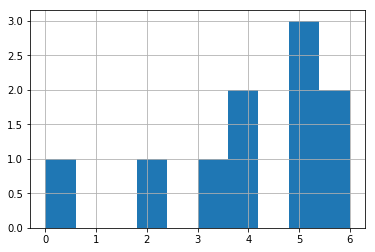

In [85]:
h = s.hist()

In [86]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [87]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [88]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [89]:
# 合并

In [90]:
df = pd.DataFrame(np.random.randn(10,4))

In [91]:
df

,0,1,2,3
0,-1.683205,0.379075,0.104299,1.040326
1,0.812634,1.237425,0.251503,-2.111604
2,-0.652241,0.160793,0.954221,0.929371
3,-0.382310,2.773234,1.727161,0.383945
4,-0.245051,1.299797,0.505211,-0.778265
5,0.270461,1.348488,0.237749,-0.387121
6,0.964115,0.361761,-0.420128,-0.286751
7,0.360175,-0.039241,1.823976,0.654350
8,-0.606516,-0.324885,0.207347,0.652826
9,0.609186,-0.651484,0.041963,0.115323


In [92]:
pieces = [df[:2],df[4:5],df[7:]]

In [93]:
pieces

[          0         1         2         3
 0 -1.683205  0.379075  0.104299  1.040326
 1  0.812634  1.237425  0.251503 -2.111604,
           0         1         2         3
 4 -0.245051  1.299797  0.505211 -0.778265,
           0         1         2         3
 7  0.360175 -0.039241  1.823976  0.654350
 8 -0.606516 -0.324885  0.207347  0.652826
 9  0.609186 -0.651484  0.041963  0.115323]

In [94]:
pd.concat(pieces)

,0,1,2,3
0,-1.683205,0.379075,0.104299,1.040326
1,0.812634,1.237425,0.251503,-2.111604
4,-0.245051,1.299797,0.505211,-0.778265
7,0.360175,-0.039241,1.823976,0.654350
8,-0.606516,-0.324885,0.207347,0.652826
9,0.609186,-0.651484,0.041963,0.115323


In [95]:
# 数据库中的join

In [96]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [97]:
left

,key,lval
0,foo,1
1,foo,2


In [98]:
right

,key,rval
0,foo,4
1,foo,5


In [99]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [100]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [101]:
df

,A,B,C,D
0,0.515706,-0.343913,-1.143467,-0.282853
1,-0.465808,0.982147,-2.112978,0.751814
2,1.139646,1.191141,-0.488457,0.933520
3,0.980471,2.099842,0.141709,-0.501590
4,-1.136226,-0.473997,0.692201,-0.708867
5,0.369937,2.071094,0.679159,0.233934
6,0.612697,0.441864,1.292859,-0.988549
7,-0.908406,-0.129767,1.009466,0.276369


In [102]:
s = df.iloc[3]

In [103]:
s

A    0.980471
B    2.099842
C    0.141709
D   -0.501590
Name: 3, dtype: float64

In [104]:
df.append(s,ignore_index=True)

,A,B,C,D
0,0.515706,-0.343913,-1.143467,-0.282853
1,-0.465808,0.982147,-2.112978,0.751814
2,1.139646,1.191141,-0.488457,0.933520
3,0.980471,2.099842,0.141709,-0.501590
4,-1.136226,-0.473997,0.692201,-0.708867
5,0.369937,2.071094,0.679159,0.233934
6,0.612697,0.441864,1.292859,-0.988549
7,-0.908406,-0.129767,1.009466,0.276369
8,0.980471,2.099842,0.141709,-0.501590


In [105]:
df

,A,B,C,D
0,0.515706,-0.343913,-1.143467,-0.282853
1,-0.465808,0.982147,-2.112978,0.751814
2,1.139646,1.191141,-0.488457,0.933520
3,0.980471,2.099842,0.141709,-0.501590
4,-1.136226,-0.473997,0.692201,-0.708867
5,0.369937,2.071094,0.679159,0.233934
6,0.612697,0.441864,1.292859,-0.988549
7,-0.908406,-0.129767,1.009466,0.276369


In [106]:
# grouping
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.154059,0.068233
1,bar,one,0.284416,0.858391
2,foo,two,-1.444429,-0.006336
3,bar,three,2.252047,-1.642489
4,foo,two,-1.456113,0.458052
5,bar,two,-0.030966,0.600636
6,foo,one,1.612718,-0.446180
7,foo,three,0.292777,-0.924161


In [107]:
df.groupby('A').sum()

,C,D
A,,
bar,2.505498,-0.183463
foo,-0.840988,-0.850392


In [108]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.284416  0.858391
    three  2.252047 -1.642489
    two   -0.030966  0.600636
foo one    1.766776 -0.377947
    three  0.292777 -0.924161
    two   -2.900541  0.451716

In [109]:
# 改变形状

In [110]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one     0.458771 -0.128252
      two     0.722495 -2.094724
baz   one    -0.038670 -1.034729
      two     3.230335  0.195410
foo   one     1.479763 -1.984426
      two    -0.862720  0.613115
qux   one     0.135332  0.359641
      two     0.836222  1.049489

In [111]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [112]:
df2 = df[:4]

In [113]:
df2

A         B
first second                    
bar   one     0.458771 -0.128252
      two     0.722495 -2.094724
baz   one    -0.038670 -1.034729
      two     3.230335  0.195410

In [114]:
stacked = df2.stack()

In [115]:
stacked

first  second   
bar    one     A    0.458771
               B   -0.128252
       two     A    0.722495
               B   -2.094724
baz    one     A   -0.038670
               B   -1.034729
       two     A    3.230335
               B    0.195410
dtype: float64

In [116]:
# 时间序列

In [117]:
rng = pd.date_range('12/27/2018 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2018-12-27    1.093643
2018-12-28    0.041524
2018-12-29   -0.341444
2018-12-30    1.288651
2018-12-31    0.979612
Freq: D, dtype: float64

In [118]:
ts_utc = ts.tz_localize('UTC') #标准时间显示

In [119]:
ts_utc

2018-12-27 00:00:00+00:00    1.093643
2018-12-28 00:00:00+00:00    0.041524
2018-12-29 00:00:00+00:00   -0.341444
2018-12-30 00:00:00+00:00    1.288651
2018-12-31 00:00:00+00:00    0.979612
Freq: D, dtype: float64

In [120]:
ts_utc.tz_convert('US/Eastern')

2018-12-26 19:00:00-05:00    1.093643
2018-12-27 19:00:00-05:00    0.041524
2018-12-28 19:00:00-05:00   -0.341444
2018-12-29 19:00:00-05:00    1.288651
2018-12-30 19:00:00-05:00    0.979612
Freq: D, dtype: float64

In [121]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [122]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [123]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [124]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [125]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [126]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [127]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [128]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [129]:
# 绘图

In [130]:
plt.style.use('ggplot')

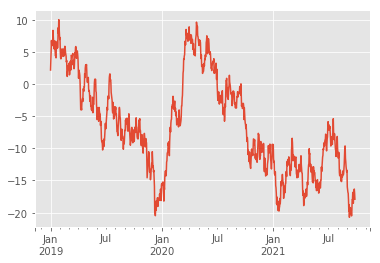

In [131]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2019', periods=1000))

p = ts.cumsum().plot()

In [132]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])

In [133]:
df

,A,B,C,D
2019-01-01,-0.096935,-1.479968,0.010529,0.478608
2019-01-02,-0.452441,-0.748793,0.038646,-0.641914
2019-01-03,-1.391681,-0.248973,0.545022,1.457373
2019-01-04,-0.428363,-0.903827,1.747961,0.409046
2019-01-05,2.025458,-0.122010,-1.395116,2.316664
2019-01-06,1.196045,0.990240,1.175013,-0.908786
2019-01-07,-0.509773,0.227425,0.540014,2.021634
2019-01-08,0.040924,-0.671107,0.810497,2.013908
2019-01-09,0.620095,-1.220383,-0.447949,-0.249929
2019-01-10,-2.198088,0.322136,1.396444,0.003628


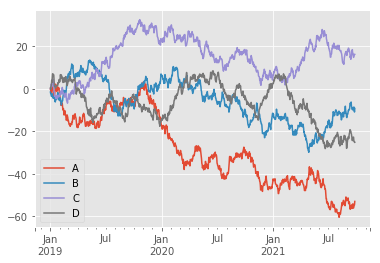

In [134]:
df.cumsum().plot()
p = plt.legend(loc="best")

In [135]:
# 文件读写

In [136]:
df.to_csv('foo.csv')

In [137]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2019-01-01,-0.096935,-1.479968,0.010529,0.478608
1,2019-01-02,-0.452441,-0.748793,0.038646,-0.641914
2,2019-01-03,-1.391681,-0.248973,0.545022,1.457373
3,2019-01-04,-0.428363,-0.903827,1.747961,0.409046
4,2019-01-05,2.025458,-0.122010,-1.395116,2.316664


In [138]:
df.to_hdf("foo.h5", "df")

In [139]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2019-01-01,-0.096935,-1.479968,0.010529,0.478608
2019-01-02,-0.452441,-0.748793,0.038646,-0.641914
2019-01-03,-1.391681,-0.248973,0.545022,1.457373
2019-01-04,-0.428363,-0.903827,1.747961,0.409046
2019-01-05,2.025458,-0.122010,-1.395116,2.316664


In [140]:
# 写入文件
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [141]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2019-01-01,-0.096935,-1.479968,0.010529,0.478608
2019-01-02,-0.452441,-0.748793,0.038646,-0.641914
2019-01-03,-1.391681,-0.248973,0.545022,1.457373
2019-01-04,-0.428363,-0.903827,1.747961,0.409046
2019-01-05,2.025458,-0.122010,-1.395116,2.316664


In [142]:
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)